In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

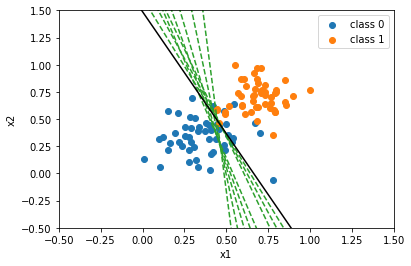

In [2]:
# Setting the random seed, feel free to change it and see different solutions.
np.random.seed(42)

def stepFunction(t):
    if t >= 0:
        return 1
    return 0

def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])

# TODO: Fill in the code below to implement the perceptron trick.
# The function should receive as inputs the data X, the labels y,
# the weights W (as an array), and the bias b,
# update the weights and bias W, b, according to the perceptron algorithm,
# and return W and b.
def perceptronStep(X, y, W, b, learn_rate = 0.01):
    for i in range(len(X)):
        y_hat = prediction(X[i], W, b)
        if y[i] == y_hat:
            continue
        if y_hat == 0:
            W[0] += X[i][0] * learn_rate
            W[1] += X[i][1] * learn_rate
            b += learn_rate
        elif y_hat == 1:
            W[0] -= X[i][0] * learn_rate
            W[1] -= X[i][1] * learn_rate
            b -= learn_rate
            
    return W, b

# This function runs the perceptron algorithm repeatedly on the dataset,
# and returns a few of the boundary lines obtained in the iterations,
# for plotting purposes.
# Feel free to play with the learning rate and the num_epochs,
# and see your results plotted below.
def trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 25):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    # These are the solution lines that get plotted below.
    boundary_lines = []
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
    return boundary_lines

# Import data
df = pd.read_csv('data.csv', sep=',', header=None, names=['x1', 'x2', 'y'])
X = df[['x1', 'x2']].values
y = df['y'].values

# Boundary lines for each epoch
boundary_lines = trainPerceptronAlgorithm(X, y, learn_rate = 0.02, num_epochs = 10)

# Plotting
x = np.linspace(-0.5, 1.5)
fig, ax = plt.subplots(1,1, figsize=(6,4))

# plot points
ax.scatter(df.loc[:49,'x1'], df.loc[:49,'x2'], label='class 0', marker='o')
ax.scatter(df.loc[50:,'x1'], df.loc[50:,'x2'], label='class 1', marker='o')

# plot boundary lines
for (slope, intercept) in boundary_lines[:-1]:
    ax.plot(x, slope*x + intercept, ls='--', color='C2')
ax.plot(x, boundary_lines[-1][0]*x + boundary_lines[-1][1], color='k')

ax.set_xlim([-0.5, 1.5])
ax.set_ylim([-0.5, 1.5])
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.legend(loc='best')
plt.show()
